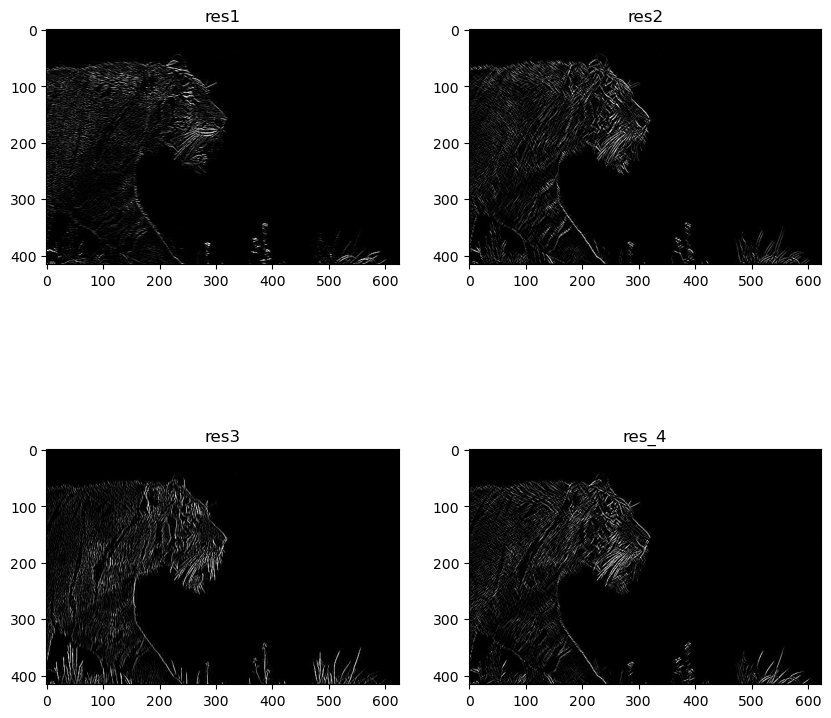

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(image, kernel):
    # Apply a convolution with the given kernel (filter) using OpenCV
    return cv2.filter2D(image, -1, kernel)

def main(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    
    filter_1 = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
    filter_2 = np.array([[2, -1, -1], [-1, 2, -1], [-1, -1, 2]])
    filter_3 = np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]])
    filter_4 = np.array([[-1, -1, 2], [-1, 2, -1], [2, -1, -1]])

    # Apply each filter
    res_1 = apply_filter(image, filter_1)
    res_2 = apply_filter(image, filter_2)
    res_3 = apply_filter(image, filter_3)
    res_4 = apply_filter(image, filter_4)

    # # Normalize the result images (Optional)
    # horizontal_edges = cv2.normalize(horizontal_edges, None, 0, 255, cv2.NORM_MINMAX)
    # vertical_edges = cv2.normalize(vertical_edges, None, 0, 255, cv2.NORM_MINMAX)
    # diagonal1_edges = cv2.normalize(diagonal1_edges, None, 0, 255, cv2.NORM_MINMAX)
    # diagonal2_edges = cv2.normalize(diagonal2_edges, None, 0, 255, cv2.NORM_MINMAX)

    # Display the results
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1), plt.imshow(res_1, cmap='gray'), plt.title('res1')
    plt.subplot(2, 2, 2), plt.imshow(res_2, cmap='gray'), plt.title('res2')
    plt.subplot(2, 2, 3), plt.imshow(res_3, cmap='gray'), plt.title('res3')
    plt.subplot(2, 2, 4), plt.imshow(res_4, cmap='gray'), plt.title('res_4')
    
    plt.show()

# Run the main function with the path to your image
main('Picture1.jpg')


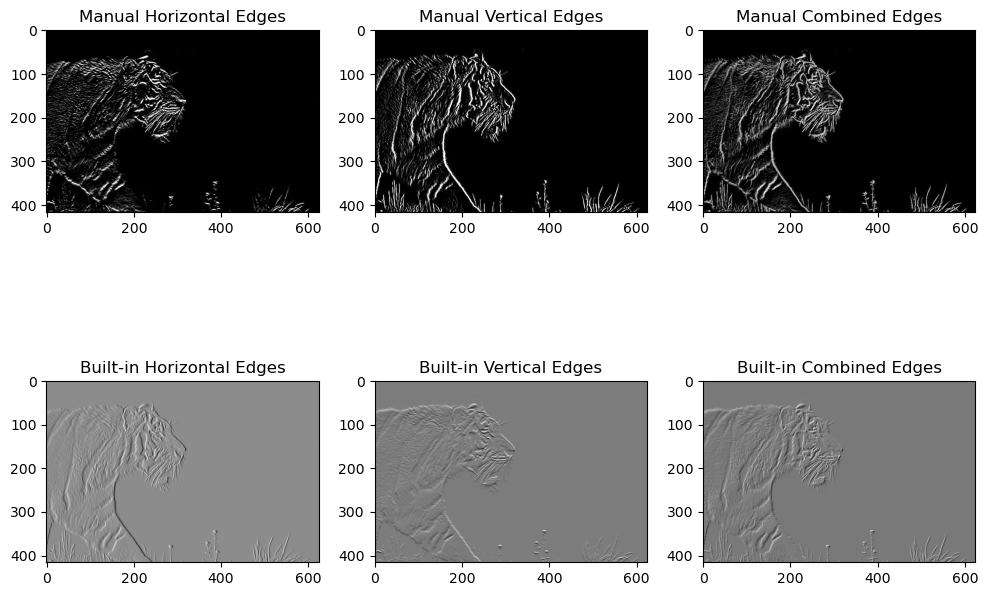

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_sobel_filter(image, kernel):
    """Apply Sobel filter manually using convolution."""
    return cv2.filter2D(image, -1, kernel)

def main(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Define Sobel kernels for horizontal and vertical edge detection
    horizontal_sobel_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    vertical_sobel_kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

    # Apply Sobel filters manually
    horizontal_edges_manual = apply_sobel_filter(image, horizontal_sobel_kernel)
    vertical_edges_manual = apply_sobel_filter(image, vertical_sobel_kernel)

    # Apply Sobel filter using OpenCV's built-in function
    horizontal_edges_builtin = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    vertical_edges_builtin = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Normalize the output to fit the [0, 255] range (for visualization)
    horizontal_edges_manual = cv2.normalize(horizontal_edges_manual, None, 0, 255, cv2.NORM_MINMAX)
    vertical_edges_manual = cv2.normalize(vertical_edges_manual, None, 0, 255, cv2.NORM_MINMAX)

    horizontal_edges_builtin = cv2.normalize(horizontal_edges_builtin, None, 0, 255, cv2.NORM_MINMAX)
    vertical_edges_builtin = cv2.normalize(vertical_edges_builtin, None, 0, 255, cv2.NORM_MINMAX)

    # Convert to float32 for proper mathematical operations
    horizontal_edges_manual = np.float32(horizontal_edges_manual)
    vertical_edges_manual = np.float32(vertical_edges_manual)

    horizontal_edges_builtin = np.float32(horizontal_edges_builtin)
    vertical_edges_builtin = np.float32(vertical_edges_builtin)

    # Combine the horizontal and vertical edges using the magnitude formula
    combined_edges_manual = cv2.sqrt(horizontal_edges_manual**2 + vertical_edges_manual**2)
    combined_edges_builtin = cv2.sqrt(horizontal_edges_builtin**2 + vertical_edges_builtin**2)

    # Normalize the combined edges to [0, 255]
    combined_edges_manual = cv2.normalize(combined_edges_manual, None, 0, 255, cv2.NORM_MINMAX)
    combined_edges_builtin = cv2.normalize(combined_edges_builtin, None, 0, 255, cv2.NORM_MINMAX)

    # Plot the results
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(horizontal_edges_manual, cmap='gray')
    plt.title('Manual Horizontal Edges')

    plt.subplot(2, 3, 2)
    plt.imshow(vertical_edges_manual, cmap='gray')
    plt.title('Manual Vertical Edges')

    plt.subplot(2, 3, 3)
    plt.imshow(combined_edges_manual, cmap='gray')
    plt.title('Manual Combined Edges')

    plt.subplot(2, 3, 4)
    plt.imshow(horizontal_edges_builtin, cmap='gray')
    plt.title('Built-in Horizontal Edges')

    plt.subplot(2, 3, 5)
    plt.imshow(vertical_edges_builtin, cmap='gray')
    plt.title('Built-in Vertical Edges')

    plt.subplot(2, 3, 6)
    plt.imshow(combined_edges_builtin, cmap='gray')
    plt.title('Built-in Combined Edges')

    plt.tight_layout()
    plt.show()

# Run the main function with the path to your image
main('Picture1.jpg')


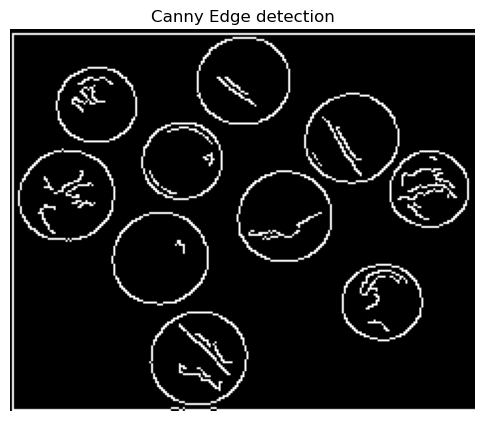

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_canny(image_path, low_threshold=100, high_threshold=200):
    """Apply the Canny edge detector using OpenCV's built-in function."""
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if image is loaded successfully
    if image is None:
        print("Error: Could not load the image.")
        return
    
    # Apply Canny edge detection
    edges = cv2.Canny(image, low_threshold, high_threshold)
    
    # Display the result
    plt.figure(figsize=(6, 6))
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge detection')
    plt.axis('off')
    plt.show()

# Example usage
apply_canny('Picture2.png')
